In [15]:
!pip install sktime

In [16]:
!pip install numba

In [17]:
!pip install sktime[all_extras]

In [1]:
from sklearn import metrics

from sktime.classification.interval_based import (
    CanonicalIntervalForest,
    DrCIF,
    RandomIntervalSpectralEnsemble,
    SupervisedTimeSeriesForest,
    TimeSeriesForestClassifier,
)
from sktime.datasets import load_basic_motions, load_italy_power_demand

In [2]:
X, y = load_italy_power_demand()

In [3]:
X

,dim_0
0,0 -0.710518 1 -1.183320 2 -1.372442 3...
1,0 -0.993009 1 -1.426786 2 -1.579884 3...
2,0 1.319067 1 0.569774 2 0.195128 3...
3,0 -0.812444 1 -1.157553 2 -1.416385 3...
4,0 -0.972840 1 -1.390518 2 -1.536705 3...
...,...
1091,0 0.431025 1 -0.518479 2 -1.118165 3...
1092,0 -0.612215 1 -1.049884 2 -1.362505 3...
1093,0 -1.262706 1 -1.449774 2 -1.519924 3...
1094,0 0.714321 1 0.629029 2 0.117277 3...


In [4]:
X["dim_0"]

0       0    -0.710518
1    -1.183320
2    -1.372442
3...
1       0    -0.993009
1    -1.426786
2    -1.579884
3...
2       0     1.319067
1     0.569774
2     0.195128
3...
3       0    -0.812444
1    -1.157553
2    -1.416385
3...
4       0    -0.972840
1    -1.390518
2    -1.536705
3...
                              ...                        
1091    0     0.431025
1    -0.518479
2    -1.118165
3...
1092    0    -0.612215
1    -1.049884
2    -1.362505
3...
1093    0    -1.262706
1    -1.449774
2    -1.519924
3...
1094    0     0.714321
1     0.629029
2     0.117277
3...
1095    0    -0.582144
1    -1.131241
2    -1.497305
3...
Name: dim_0, Length: 1096, dtype: object

In [5]:
X["dim_0"][0]

0    -0.710518
1    -1.183320
2    -1.372442
3    -1.593083
4    -1.467002
5    -1.372442
6    -1.088760
7     0.045967
8     0.928532
9     1.086133
10    1.275254
11    0.960052
12    0.613330
13    0.014447
14   -0.647477
15   -0.269235
16   -0.206195
17    0.613330
18    1.369815
19    1.464375
20    1.054613
21    0.581810
22    0.172048
23   -0.269235
dtype: float64

In [6]:
X["dim_0"][1001]

0    -0.800923
1    -1.200829
2    -1.334131
3    -1.494093
4    -1.520754
5    -1.494093
6    -1.547414
7    -0.774262
8     0.558758
9     1.198607
10    1.251928
11    1.331909
12    1.091965
13    0.612078
14    0.665399
15    0.852022
16    0.932003
17    0.585418
18    0.452116
19    0.185512
20    0.025550
21    0.132191
22    0.265493
23    0.025550
dtype: float64

In [7]:
y.shape

(1096,)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [9]:
dir_list=os.listdir('..')[:11]
dir_list.remove("fase11")

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# x = np.arange(len(dir_list))
# ys = [i+x+(i*x)**2 for i in range(len(ys))]

colors = cm.rainbow(np.linspace(0, 1, len(dir_list)))
print(len(colors))

10


../fase1/CSV_files/BEP/h12_1_BEP_data.csv
../fase10/CSV_files/BEP/h12_10_BEP_data.csv
../fase2/CSV_files/BEP/h12_2_BEP_data.csv
../fase3/CSV_files/BEP/h12_3_BEP_data.csv
../fase4/CSV_files/BEP/h12_4_BEP_data.csv
../fase5/CSV_files/BEP/h12_5_BEP_data.csv
../fase6/CSV_files/BEP/h12_6_BEP_data.csv
../fase7/CSV_files/BEP/h12_7_BEP_data.csv
../fase8/CSV_files/BEP/h12_8_BEP_data.csv
../fase9/CSV_files/BEP/h12_9_BEP_data.csv


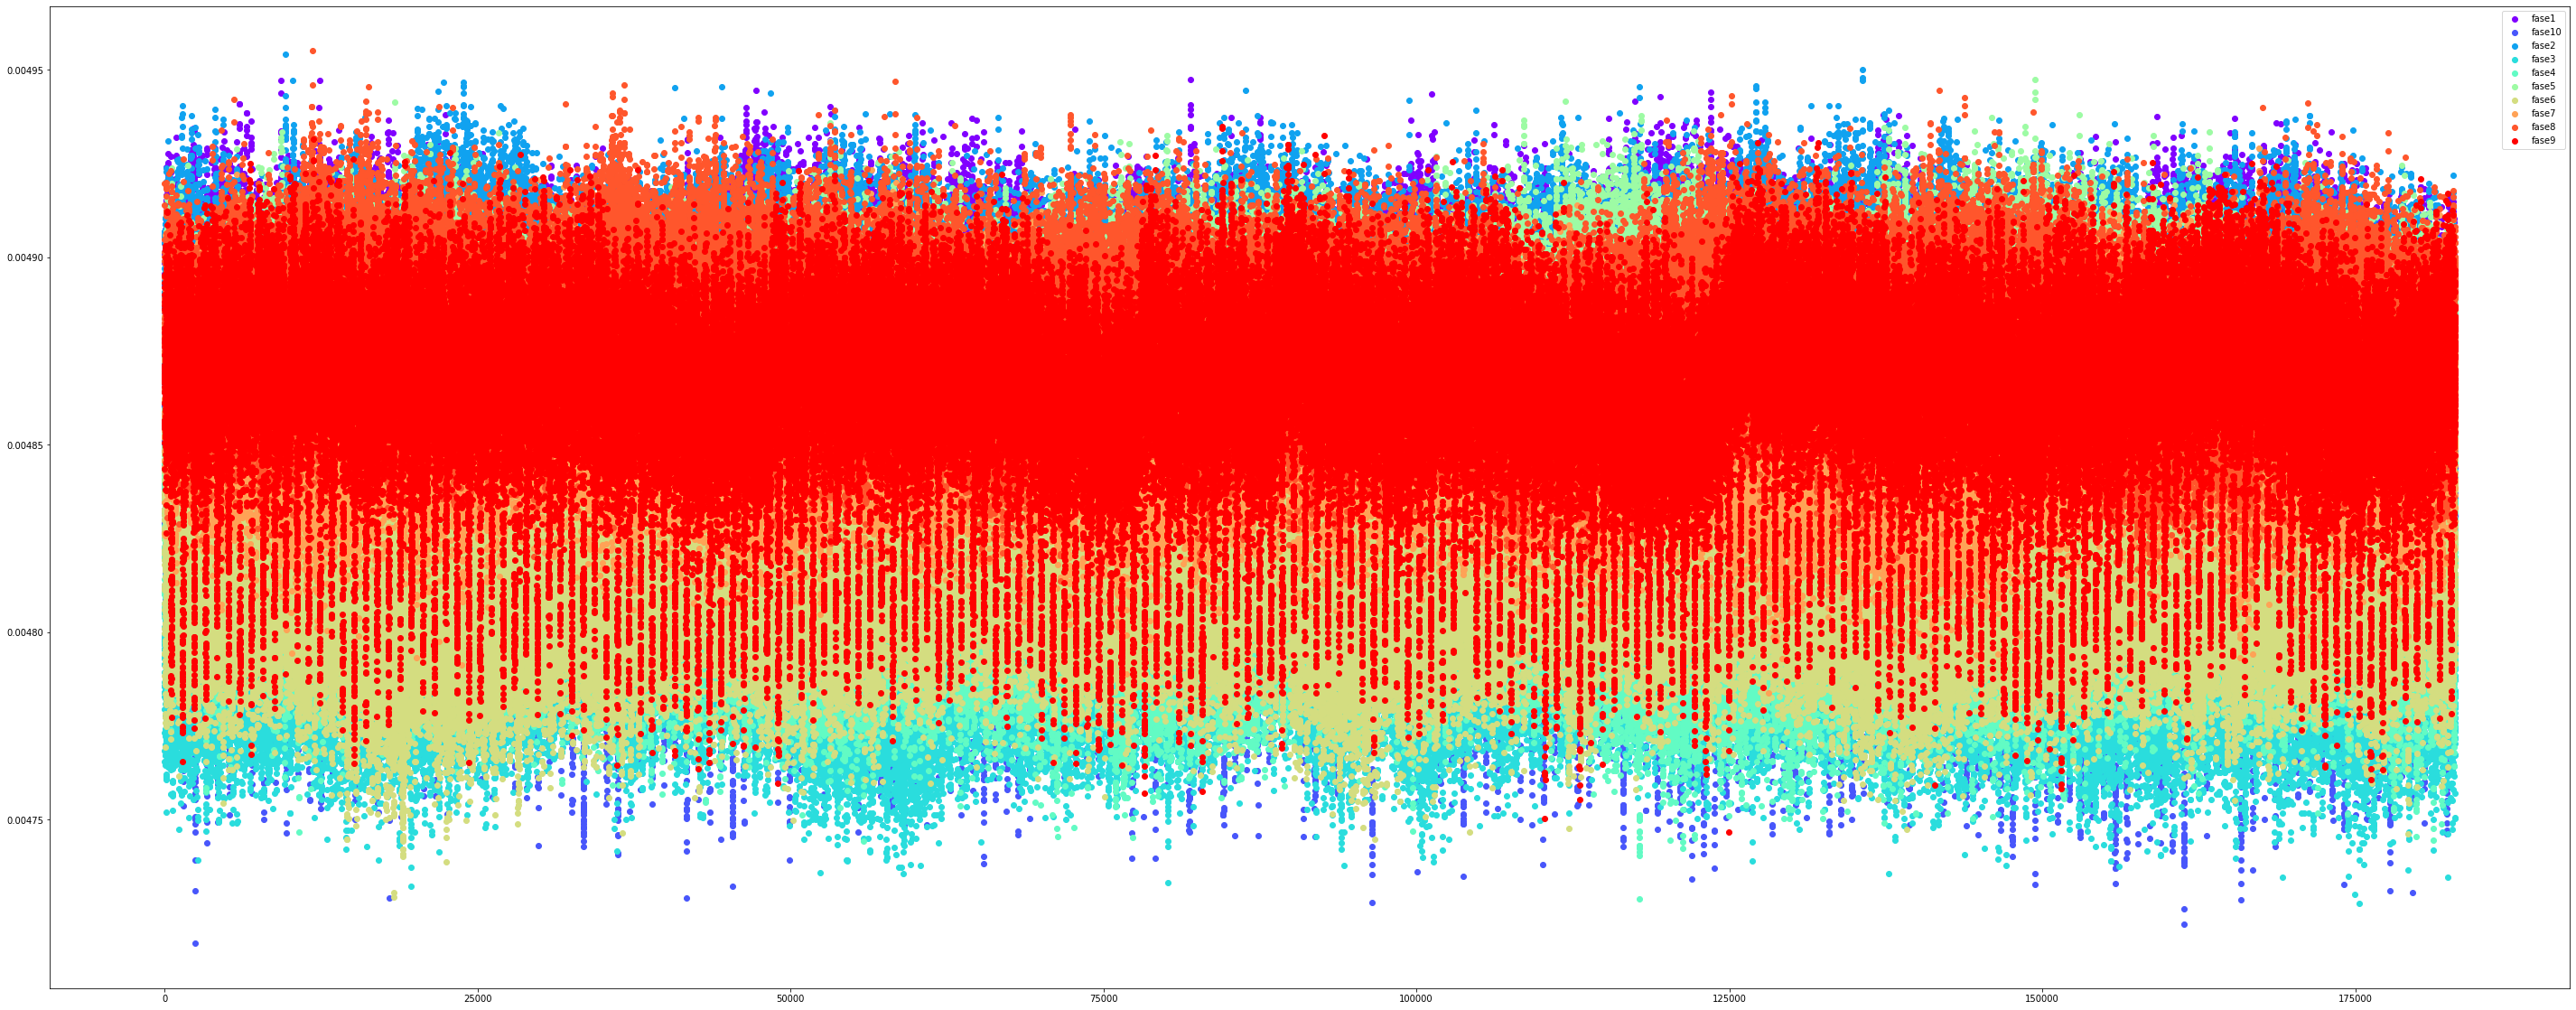

In [11]:
current=".."
total=pd.DataFrame(columns=[["PGV1","fase"]])
total['PGV1']=total['PGV1'].astype("float64")
total['fase'] = total['fase'].astype(int)

test=pd.DataFrame(columns=[["PGV1","fase"]])
test['PGV1']=total['PGV1'].astype("float64")
test['fase'] = total['fase'].astype(int)
i=0
plt.figure(figsize=(50, 20))
for path, subdirs, files in os.walk(current):
    #print(subdirs)
    for name in files:
        if 'ref' in path or name[0:1] == ".":
            continue
        if name.endswith(".csv") and "h12" in name and "BEP" in name and "Properties" not in path and "fase11" not in path:
            name_=os.path.join(path, name)
            print(name_)
            df_read = pd.read_csv(name_)
#             df=pd.DataFrame(df_read["PGV1"][:116000])
#             df1=pd.DataFrame(df_read["PGV1"][116000:116000+29000])
            df=pd.DataFrame(df_read["PGV1"][:183000])
            df1=pd.DataFrame(df_read["PGV1"][183000:183000+45750])
            

            
            x1 = np.linspace(0, len(df), len(df), endpoint = False)
            for fase in dir_list:
                if fase+"/" in path:
                    num=re.findall(r'\d+', fase)
                    df["fase"]=int(num[0])
                    df['fase'] = df['fase'].astype(int)
                    df1["fase"]=int(num[0])
                    df1['fase'] = df1['fase'].astype(int)
                    
                    
                    
                    if fase=="fase1":
                        total=df
                        test=df1
                    else:
                    #print(df,"--")
                    #total.loc[len(total.index)]=
                        #pd.merge([total,df],on = ['PGV1', 'fase'])
                        total=pd.concat([total,df])
                        test=pd.concat([test,df1])
#                     #df.plot()
#                     plt.scatter(df,range(len(df)), color = colors[i])
                    plt.scatter(x1,df["PGV1"], color = colors[i],label=fase)
                    
                            
            i+=1
plt.legend()
plt.show()

In [12]:
test=test.reset_index(drop=True)

In [13]:
test

,PGV1,fase
0,0.004831,1
1,0.004835,1
2,0.004844,1
3,0.004856,1
4,0.004847,1
...,...,...
457495,0.004860,9
457496,0.004867,9
457497,0.004875,9
457498,0.004883,9


In [14]:
temp_data=np.array_split(total["PGV1"], 10)
temp_label=np.array_split(total["fase"], 10)

In [15]:
test_temp_data=np.array_split(test["PGV1"], 10)
test_temp_label=np.array_split(test["fase"], 10)

In [16]:
train_x=[]
train_y=[]
for i in range(len(temp_data)):
    #print(np.array_split(temp_data[i], 20))
    train_x.extend(np.array_split(temp_data[i], 200))
    train_y.extend(np.array_split(temp_label[i], 200))
    
test_x=[]
test_y=[]
for i in range(len(test_temp_data)):
    #print(np.array_split(temp_data[i], 20))
    test_x.extend(np.array_split(test_temp_data[i], 50))
    test_y.extend(np.array_split(test_temp_label[i], 50))

In [17]:
train_x[1]

915     0.004903
916     0.004895
917     0.004911
918     0.004909
919     0.004909
          ...   
1825    0.004859
1826    0.004874
1827    0.004849
1828    0.004858
1829    0.004878
Name: PGV1, Length: 915, dtype: float64

In [18]:
x_train_file = train_x
y_train_file = train_y
x_test_file = test_x
y_test_file = test_y
# Create empty lists
x_train = []
y_train = []
x_test = []
y_test = []
# Mapping table for classes
labels = {1:'fase1', 2:'fase2', 3:'fase3',
          4:'fase4', 5:'fase5', 6:'fase6',
          7:'fase7', 8:'fase8', 9:'fase9',
          10:'fase10'
         }
# Loop through datasets
# for x in x_train_file:
#     x_train.append([float(ts) for ts in x.split()])
    
# for y in y_train_file:
#     y_train.append(int(y.rstrip('\n')))
    
# for x in x_test_file:
#     x_test.append([float(ts) for ts in x.split()])
    
# for y in y_test_file:
#     y_test.append(int(y.rstrip('\n')))
    
# Convert to numpy for efficiency
x_train = np.array(train_x)
y_train = np.array(train_y)
x_test = np.array(test_x)
y_test = np.array(test_y)
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

In [19]:
x_train.shape

(2000, 915)

In [20]:
x_test.shape

(500, 915)

In [21]:
temp_=[]
temp=[]
for num in range(len(y_train)):
    temp_.append(np.average(y_train[num]))
for num in range(len(y_test)):
    temp.append(np.average(y_test[num]))

In [22]:
len(temp_),len(temp)

(2000, 500)

In [23]:
arr_ = np.array(temp_)
arr=np.array(temp)

In [24]:
y_train=arr_
y_test=arr

In [25]:
x_train[0]

array([0.00488134, 0.00487402, 0.00487227, 0.00487005, 0.00487898,
       0.00486697, 0.00487365, 0.00487788, 0.00487106, 0.00487031,
       0.00486955, 0.00487373, 0.00487849, 0.00488744, 0.00489267,
       0.00490139, 0.00489564, 0.00488548, 0.00489025, 0.00489026,
       0.00490373, 0.00489851, 0.00490091, 0.00488705, 0.00488205,
       0.00488552, 0.0048719 , 0.00487408, 0.00488937, 0.00486423,
       0.00484972, 0.00484023, 0.00485956, 0.00486174, 0.00485838,
       0.00484978, 0.00485345, 0.00485646, 0.00485823, 0.00486552,
       0.00486114, 0.00485179, 0.00486511, 0.00488011, 0.00488135,
       0.00487822, 0.00488616, 0.00488297, 0.00487385, 0.00487692,
       0.00486396, 0.0048775 , 0.00489707, 0.00488651, 0.00487273,
       0.00487775, 0.0048819 , 0.00489535, 0.00487762, 0.00487274,
       0.00487005, 0.00486694, 0.00487634, 0.00488208, 0.00488073,
       0.00488719, 0.00487822, 0.00487687, 0.00488067, 0.00487863,
       0.00489559, 0.00489197, 0.00488486, 0.00488548, 0.00489

In [26]:
tmp=np.array_split(x_train, 2000)
Xx=pd.DataFrame(x_train)

In [28]:
y_train

array([1., 1., 1., ..., 9., 9., 9.])

In [31]:
x_train[0]

array([0.00488134, 0.00487402, 0.00487227, 0.00487005, 0.00487898,
       0.00486697, 0.00487365, 0.00487788, 0.00487106, 0.00487031,
       0.00486955, 0.00487373, 0.00487849, 0.00488744, 0.00489267,
       0.00490139, 0.00489564, 0.00488548, 0.00489025, 0.00489026,
       0.00490373, 0.00489851, 0.00490091, 0.00488705, 0.00488205,
       0.00488552, 0.0048719 , 0.00487408, 0.00488937, 0.00486423,
       0.00484972, 0.00484023, 0.00485956, 0.00486174, 0.00485838,
       0.00484978, 0.00485345, 0.00485646, 0.00485823, 0.00486552,
       0.00486114, 0.00485179, 0.00486511, 0.00488011, 0.00488135,
       0.00487822, 0.00488616, 0.00488297, 0.00487385, 0.00487692,
       0.00486396, 0.0048775 , 0.00489707, 0.00488651, 0.00487273,
       0.00487775, 0.0048819 , 0.00489535, 0.00487762, 0.00487274,
       0.00487005, 0.00486694, 0.00487634, 0.00488208, 0.00488073,
       0.00488719, 0.00487822, 0.00487687, 0.00488067, 0.00487863,
       0.00489559, 0.00489197, 0.00488486, 0.00488548, 0.00489

In [32]:
tsf = TimeSeriesForestClassifier(n_estimators=50, random_state=47)
tsf.fit(x_train, y_train)

tsf_preds = tsf.predict(x_test)
print("TSF Accuracy: " + str(metrics.accuracy_score(y_test, tsf_preds)))


TSF Accuracy: 0.666


In [33]:
tsf_preds

array([ 5.,  5.,  5.,  7.,  5.,  7.,  7.,  5.,  8.,  5.,  5.,  5.,  5.,
        5.,  1.,  1.,  5.,  5.,  8.,  1.,  5.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  8.,  1.,  5.,  1.,  1.,  1.,  1.,  2.,  1.,
        2.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  8.,  8., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10.,  1.,  5.,  8.,  2.,
        2.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,  8.,  5.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,
        2.,  8.,  2.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  1.,
        1.,  1.,  2.,  2.,  1.,  2.,  1.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  3.,  3.,  3.,
        3.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3

In [34]:
z=np.array([x_test[220]])

In [35]:
z.shape

(1, 915)

In [36]:
z

array([[0.0048236 , 0.004822  , 0.00482905, 0.00482419, 0.0048176 ,
        0.00482731, 0.00482466, 0.0048127 , 0.0048098 , 0.00480731,
        0.00480154, 0.00480082, 0.00479736, 0.00480063, 0.00480572,
        0.00479923, 0.00480853, 0.00480802, 0.00481316, 0.00481313,
        0.00481379, 0.00481763, 0.00481322, 0.00480825, 0.00480785,
        0.00481096, 0.00482339, 0.00481998, 0.00483519, 0.00483142,
        0.00482044, 0.00482385, 0.00482078, 0.00483826, 0.00483564,
        0.00482893, 0.00483915, 0.0048259 , 0.00482029, 0.00482187,
        0.00480915, 0.004809  , 0.00479296, 0.00480083, 0.00479685,
        0.00478952, 0.00479658, 0.00479069, 0.00479611, 0.00480002,
        0.00479289, 0.00479125, 0.00478654, 0.00479192, 0.00479974,
        0.00479925, 0.0048067 , 0.0048301 , 0.00482019, 0.00482139,
        0.00481813, 0.00481998, 0.00482529, 0.00480802, 0.00481747,
        0.00482098, 0.00483013, 0.00482976, 0.00482102, 0.00481491,
        0.00479223, 0.00479212, 0.00481367, 0.00

In [37]:
tsf_preds_0 = tsf.predict(z)
print(tsf_preds_0,y_test[220])
#print("TSF Accuracy: " + str(metrics.accuracy_score(y_test, tsf_preds)))

[4.] 4.0


In [38]:
rise = RandomIntervalSpectralEnsemble(n_estimators=50, random_state=47)
rise.fit(x_train, y_train)

rise_preds = rise.predict(x_test)
print("RISE Accuracy: " + str(metrics.accuracy_score(y_test, rise_preds)))

RISE Accuracy: 0.704


In [39]:
rise_preds

array([ 5.,  5.,  5.,  5.,  5.,  5.,  7.,  7.,  9.,  5.,  7.,  5.,  5.,
        5.,  2.,  1.,  7.,  5.,  9.,  1.,  5.,  8.,  1.,  1.,  2.,  2.,
        2.,  1.,  1.,  1.,  1.,  2.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  5.,  8., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10.,  5.,  2.,  8.,  2.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  8.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  6.,  6.,  4.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  6.,  3.,  3.,  3.,  3.,  3

In [40]:
tsf = TimeSeriesForestClassifier(n_estimators=50, random_state=47)
tsf.fit(x_train, y_train)

tsf_preds = tsf.predict(x_test)
print("TSF Accuracy: " + str(metrics.accuracy_score(y_test, tsf_preds)))

TSF Accuracy: 0.666


In [41]:
tsf = TimeSeriesForestClassifier(n_estimators=100, random_state=47)
tsf.fit(x_train, y_train)

tsf_preds = tsf.predict(x_test)
print("TSF Accuracy: " + str(metrics.accuracy_score(y_test, tsf_preds)))

TSF Accuracy: 0.664


In [42]:
tsf = TimeSeriesForestClassifier(n_estimators=500, random_state=470)
tsf.fit(x_train, y_train)

tsf_preds = tsf.predict(x_test)
print("TSF Accuracy: " + str(metrics.accuracy_score(y_test, tsf_preds)))

TSF Accuracy: 0.67


In [43]:
tsf = TimeSeriesForestClassifier(n_estimators=5000, random_state=4700)
tsf.fit(x_train, y_train)

tsf_preds = tsf.predict(x_test)
print("TSF Accuracy: " + str(metrics.accuracy_score(y_test, tsf_preds)))

TSF Accuracy: 0.668


In [44]:
rise = RandomIntervalSpectralEnsemble(n_estimators=50, random_state=47)
rise.fit(x_train, y_train)

rise_preds = rise.predict(x_test)
print("RISE Accuracy: " + str(metrics.accuracy_score(y_test, rise_preds)))

RISE Accuracy: 0.704


In [45]:
rise = RandomIntervalSpectralEnsemble(n_estimators=100, random_state=47)
rise.fit(x_train, y_train)

rise_preds = rise.predict(x_test)
print("RISE Accuracy: " + str(metrics.accuracy_score(y_test, rise_preds)))

RISE Accuracy: 0.742


In [46]:
rise = RandomIntervalSpectralEnsemble(n_estimators=500, random_state=470)
rise.fit(x_train, y_train)

rise_preds = rise.predict(x_test)
print("RISE Accuracy: " + str(metrics.accuracy_score(y_test, rise_preds)))

RISE Accuracy: 0.752


In [47]:
stsf = SupervisedTimeSeriesForest(n_estimators=50, random_state=47)
stsf.fit(x_train, y_train)

stsf_preds = stsf.predict(x_test)
print("STSF Accuracy: " + str(metrics.accuracy_score(y_test, stsf_preds)))

STSF Accuracy: 0.646


In [48]:
stsf = SupervisedTimeSeriesForest(n_estimators=100, random_state=47)
stsf.fit(x_train, y_train)

stsf_preds = stsf.predict(x_test)
print("STSF Accuracy: " + str(metrics.accuracy_score(y_test, stsf_preds)))

STSF Accuracy: 0.63


In [49]:
stsf = SupervisedTimeSeriesForest(n_estimators=500, random_state=42)
stsf.fit(x_train, y_train)

stsf_preds = stsf.predict(x_test)
print("STSF Accuracy: " + str(metrics.accuracy_score(y_test, stsf_preds)))

STSF Accuracy: 0.64
